In [80]:
import networkx as nx
import statistics as st
import numpy as np
from enum import Enum
from itertools import chain
from collections import Counter
from typing import Type, TypeVar
import random
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)

## State representation

### Full

In [50]:
colors = ['R', 'O', 'G', 'Y', 'B', 'W']
posible_color_pairs = [
    ('R', 'O'),
    ('R', 'G'),
    ('R', 'Y'),
    ('R', 'W'),
    ('O', 'G'),
    ('O', 'Y'),
    ('O', 'B'),
    ('G', 'B'),
    ('G', 'W'),
    ('Y', 'B'),
    ('Y', 'W'),
    ('B', 'W'),
]
nodes = [f'{c}{s}' for c in colors for s in range(9)]

edges = []

# edges inside side groups
for c in colors:
    for n in [(0,1,2), (3,4,5), (6,7,8), (0,3,6), (1,4,7), (2,5,8)]:
        edges = edges + [(f'{c}{n[0]}', f'{c}{n[1]}'), (f'{c}{n[1]}', f'{c}{n[2]}'),]

# horisontal relations
for i in [('R','W'), ('W','Y'), ('Y','B'), ('B','R')]:
    edges.append((f'{i[0]}2', f'{i[1]}0'))
    edges.append((f'{i[0]}5', f'{i[1]}3'))
    edges.append((f'{i[0]}8', f'{i[1]}6'))

# vertical relations
for i in [('G','W'), ('W','O')]:
    edges.append((f'{i[0]}6', f'{i[1]}0'))
    edges.append((f'{i[0]}7', f'{i[1]}1'))
    edges.append((f'{i[0]}8', f'{i[1]}2'))

edges.append(('O6', 'B8'))
edges.append(('O7', 'B7'))
edges.append(('O8', 'B6'))

edges.append(('B2', 'G0'))
edges.append(('B1', 'G1'))
edges.append(('B0', 'G2'))

# diagonal relations

edges.append(('R0', 'G0'))
edges.append(('R1', 'G3'))
edges.append(('R2', 'G6'))

edges.append(('G2', 'Y2'))
edges.append(('G5', 'Y1'))
edges.append(('G8', 'Y0'))

edges.append(('Y8', 'O8'))
edges.append(('Y7', 'O5'))
edges.append(('Y6', 'O2'))

edges.append(('O6', 'R6'))
edges.append(('O3', 'R7'))
edges.append(('O0', 'R8'))

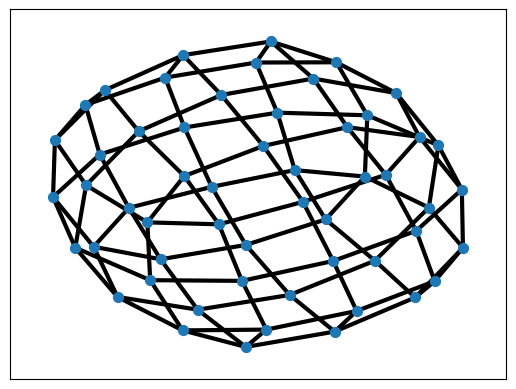

In [52]:
full = nx.Graph()
full.add_nodes_from(nodes)
full.add_edges_from(edges)
nx.draw_networkx(full, node_size=50, width=3.0, with_labels=False)

### Low

In [51]:
low = full.copy()

# horisontal
for i in [('R','W'), ('W','Y'), ('Y','B'), ('B','R')]:
    nx.contracted_nodes(low, f'{i[0]}5', f'{i[1]}3', self_loops=False, copy=False)
    nx.relabel_nodes(low, mapping={f'{i[0]}5': f'{i[0]}5/{i[1]}3'}, copy=False)

# vertical
for i in [('G','W'), ('W','O')]:
    nx.contracted_nodes(low, f'{i[0]}7', f'{i[1]}1', self_loops=False, copy=False)
    nx.relabel_nodes(low, mapping={f'{i[0]}7': f'{i[0]}7/{i[1]}1'}, copy=False)

nx.contracted_nodes(low, 'O7', 'B7', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G1', 'B1', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R7', 'O3', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R1', 'G3', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G5', 'Y1', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O5', 'Y7', self_loops=False, copy=False)
nx.relabel_nodes(
    low,
    mapping={
        'O7': 'O7/B7',
        'G1': 'G1/B1',
        'R7': 'R7/O3',
        'R1': 'R7/G3',
        'G5': 'G5/Y1',
        'O5': 'O5/Y7',
    },
    copy=False
)

# diagonal
nx.contracted_nodes(low, 'R2', 'W0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R2', 'G6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R8', 'W6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R8', 'O0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G8', 'W2', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G8', 'Y0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O2', 'W8', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O2', 'Y6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G0', 'R0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G0', 'B2', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G2', 'Y2', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G2', 'B0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O6', 'R6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O6', 'B8', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O8', 'Y8', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O8', 'B6', self_loops=False, copy=False)

nx.relabel_nodes(
    low,
    mapping={
        'R2': 'R2/W0/G6',
        'R8': 'R8/W6/O0',
        'G8': 'G8/W2/Y0',
        'O2': 'O2/W8/Y6',
        'G0': 'G0/R0/B2',
        'G2': 'G2/Y2/B0',
        'O6': 'O6/R6/B8',
        'O8': 'O8/Y8/B6',
    },
    copy=False
)

In [54]:
list(low.nodes)

['R4',
 'O4',
 'G4',
 'Y4',
 'B4',
 'W4',
 'R5/W3',
 'W5/Y3',
 'Y5/B3',
 'B5/R3',
 'G7/W1',
 'W7/O1',
 'R7/G3',
 'R7/O3',
 'O5/Y7',
 'O7/B7',
 'G1/B1',
 'G5/Y1',
 'R2/W0/G6',
 'R8/W6/O0',
 'O2/W8/Y6',
 'O6/R6/B8',
 'O8/Y8/B6',
 'G0/R0/B2',
 'G2/Y2/B0',
 'G8/W2/Y0']

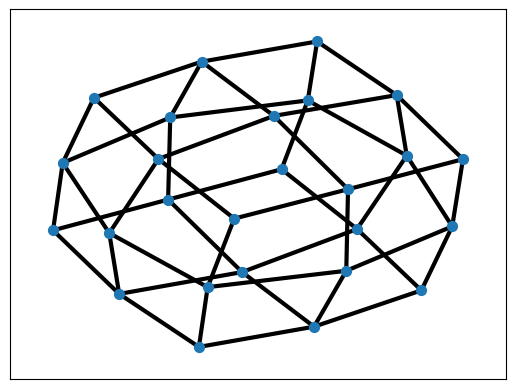

In [53]:
nx.draw_networkx(low, node_size=50, width=3.0, with_labels=False)

### Stats

In [55]:
def met(m: str, f, l) -> str:
    print(f'{m}: full - {f}, low - {l}')

met('Nodes', full.number_of_nodes(), low.number_of_nodes())
met('Edges', full.number_of_edges(), low.number_of_edges())
met('Dencity', nx.density(full), nx.density(low))
met('Diameter', nx.diameter(full), nx.diameter(low))
met('Clustering coef', nx.average_clustering(full), nx.average_clustering(low))
met('Degree', nx.average_degree_connectivity(full), nx.average_degree_connectivity(low))

Nodes: full - 54, low - 26
Edges: full - 108, low - 48
Dencity: full - 0.07547169811320754, low - 0.1476923076923077
Diameter: full - 8, low - 6
Clustering coef: full - 0.07407407407407404, low - 0.0
Degree: full - {4: 4.0}, low - {4: 3.6666666666666665, 3: 4.0}


## Class based

Edges 160
Dencity 0.24615384615384617


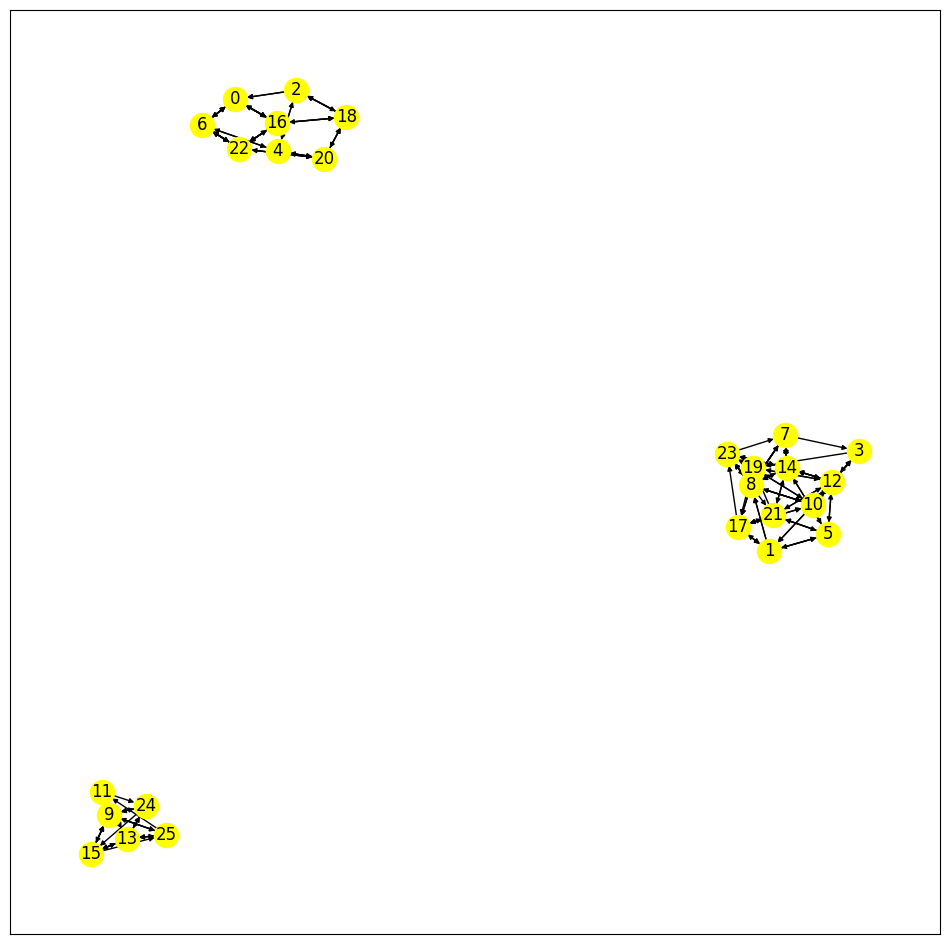

In [81]:
T = TypeVar('T', bound=Enum)


class BaseEnum(Enum):

    @classmethod
    def get_names(cls: Type[T]) -> list[T]:
        return [e for e in cls]

    @classmethod
    def get_values(cls: Type[T]) -> list[int]:
        return [e.value for e in cls]

    @classmethod
    def get_map(cls: Type[T]) -> dict[int, T]:
        return {e.value: e for e in cls}


class Colors(BaseEnum):
    B = 25
    G = 9
    O = 13
    R = 11
    W = 24
    Y = 15
    BG = 1
    BO = 5
    BR = 3
    BY = 7
    GR = 10
    GW = 17
    GY = 8
    OR = 12
    OW = 21
    OY = 14
    RW = 19
    WY = 23
    BGR = 2
    BGY = 0
    BOR = 4
    BOY = 6
    GRW = 18
    GWY = 16
    ORW = 20
    OWY = 22


class Layer:

    def __init__(
        self,
        map: list[int],
        graph: nx.MultiDiGraph,
        counter: Counter,
    ) -> None:
        self.map = map
        self.graph = graph
        self.counter = counter

    def forward(self) -> None:
        self.counter['step'] += 1
        labels = [
            self.graph.nodes[i]['color']
            for i
            in chain(self.map[2:], self.map[0:2])
        ]
        for n, c in zip(self.map, labels):
            self.graph.nodes[n]['color'] = c
        for s, t in zip(self.map, chain(self.map[2:], self.map[0:2])):
            self.graph.add_edge(s, t, step = self.counter['step'])

    def backward(self) -> None:
        self.counter['step'] += 1
        labels = [
            self.graph.nodes[i]['color']
            for i
            in chain(self.map[-2:], self.map[0:-2])
        ]
        for n, c in zip(self.map, labels):
            self.graph.nodes[n]['color'] = c
        for s, t in zip(self.map, chain(self.map[-2:], self.map[0:-2])):
            self.graph.add_edge(s, t, step = self.counter['step'])


class Cube:

    def __init__(self) -> None:
        self.graph = nx.MultiDiGraph()
        self.counter = Counter({'step': 0})
        self
        self.reset()

    def rotate_random(self, n: int = 20) -> None:
        """Rotate random layers n times
        """
        layers = [v for v in self.__dict__.values() if isinstance(v, Layer)]
        directions = ['forward', 'backward']
        for _ in range(n):
            c = random.choice(layers)
            d = random.choice(directions)
            getattr(c, d)()


    def reset(self) -> None:
        """Reset cube state to complete
        """
        self.graph.clear()
        self.counter['step'] = 0
        self.graph.add_nodes_from(Colors.get_values(), color=None)
        nx.set_node_attributes(self.graph, Colors.get_map(), name='color')
        nx.set_edge_attributes(self.graph, {}, name='step')
        self.layer_x1 = Layer(list(range(0, 8)), self.graph, self.counter)
        self.layer_x2 = Layer(list(range(8, 16)), self.graph, self.counter)
        self.layer_x3 = Layer(list(range(16, 24)), self.graph, self.counter)
        self.layer_y1 = Layer([0, 8, 16, 23, 22, 14, 6, 7], self.graph, self.counter)
        self.layer_y2 = Layer([1, 9, 17, 24, 21, 13, 5, 25], self.graph, self.counter)
        self.layer_y3 = Layer([2, 10, 18, 19, 20, 12, 4, 3], self.graph, self.counter)
        self.layer_z1 = Layer([0, 1, 2, 10, 18, 17, 16, 8], self.graph, self.counter)
        self.layer_z2 = Layer([7, 25, 3, 11, 19, 24, 23, 15], self.graph, self.counter)
        self.layer_z3 = Layer([6, 5, 4, 12, 20, 21, 22, 14], self.graph, self.counter)

c = Cube()
c.rotate_random()
plt.figure(3,figsize=(12,12))
pos = {0: }
nx.draw_networkx(c.graph, posnode_size=300, node_color='yellow', arrowsize=7, width=1.0)
print(f'Edges {c.graph.number_of_edges()}')
print(f'Dencity {nx.density(c.graph)}')
